In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
# Merge on mouse ID, with how set to outer -> this will keep
# all of the data from both dataframes
mouse_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how="right")

# Display the data table for preview
mouse_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0
5,h246,Ketapril,Male,13,30,0,45.0,0
6,p189,Ketapril,Male,8,28,0,45.0,0
7,n923,Ketapril,Male,19,30,0,45.0,0
8,q119,Ketapril,Male,17,30,0,45.0,0
9,f993,Naftisol,Male,21,28,0,45.0,0


In [2]:
# Find the total number of mice in the study
number_mice = mouse_df['Mouse ID'].nunique()
number_mice

249

In [3]:
# Check for duplicates in by Mouse ID and Timepoint using .duplicate()
duplicate_mice = mouse_df[mouse_df.duplicated(subset = ['Mouse ID','Timepoint'])]

# Get the duplicate mice by ID number and display
duplicate_mice_ID = duplicate_mice['Mouse ID'].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# Use .isin() to filter the merged dataframe -> this will include 
# only the rows where the value in the 'Mouse ID' column is also in
# the duplicate mice list 
duplicate_info = mouse_df[mouse_df['Mouse ID'].isin(duplicate_mice_ID)]
duplicate_info

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Remove the duplicates and create a cleaned dataframe 
# Use the isin function, this time set to False -> this will include
# all of the mice IDs EXCEPT for the one that was found to be a duplicate 
cleaned_mouse_df = mouse_df[mouse_df['Mouse ID'].isin(duplicate_mice_ID)==False]
cleaned_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [6]:
# Check the number of mice in the cleaned dataframe
number_unique_mice = cleaned_mouse_df['Mouse ID'].nunique()
number_unique_mice

248

# Summary Statistics 

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# First create the grouped dataframe
mice_grouped = cleaned_mouse_df.groupby('Drug Regimen')

# Next calculate each summary statistic
tumor_mean = mice_grouped['Tumor Volume (mm3)'].mean()
tumor_median = mice_grouped['Tumor Volume (mm3)'].median()
tumor_variance = mice_grouped['Tumor Volume (mm3)'].var()
tumor_std = mice_grouped['Tumor Volume (mm3)'].std()
tumor_sem = mice_grouped['Tumor Volume (mm3)'].sem()

# Combine the series into one dataframe
summary_stats = pd.concat([tumor_mean, tumor_median, 
                          tumor_variance, tumor_std, 
                          tumor_sem], axis = 1)
# Rename the columns and set index
summary_stats.columns = ['Mean Tumor Volume','Median Tumor Volume',
                         'Tumor Volume Variance', 'Tumor Volume Standard Deviation',
                         'Tumor Volume Standard Error'
                         ]
summary_stats.index_name = 'Drug Regimen'
#Display the full dataframe
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# For a more advanced method of producing a summary statistics table with the mean, median,
# variance, standard deviation, and SEM, use the aggregate function 

advanced_summary = cleaned_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var', 'std','sem'])                                                                                                                                                                         
advanced_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts 

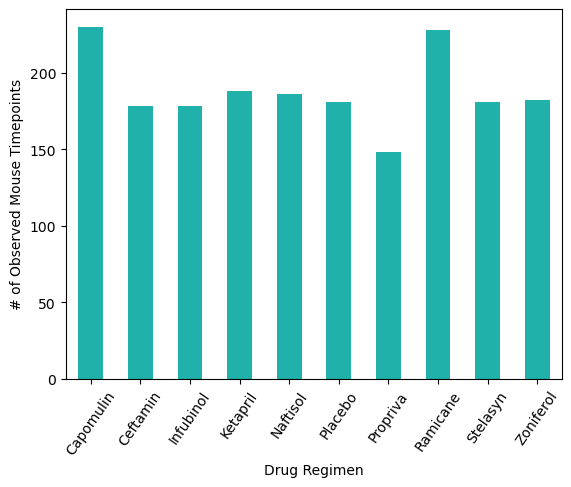

In [31]:
# Create a bar chart showing the total number of mice for each drug regimen using pandas
# First count the mice per treatment 
mice_per_drug = cleaned_mouse_df.groupby(['Drug Regimen'])['Mouse ID'].count()

# Next create the bar chart using the Dataframe.plot() method
mice_per_drug.plot(kind='bar', color='lightseagreen', xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints', rot=55)
plt.show()


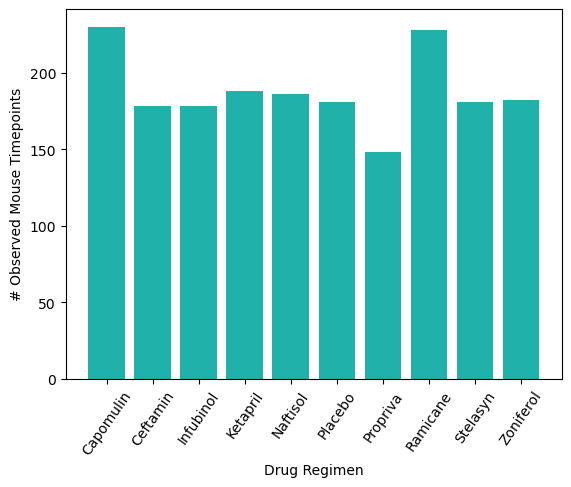

In [33]:
# Create a bar chart using pyplot
# First get the desired data from the mouse counts
drug = mice_per_drug.index
counts = mice_per_drug.values

# Next create the bar chart using matplotlib's pyplot method 
plt.bar(drug, counts, color = 'lightseagreen')
plt.xlabel('Drug Regimen')
plt.ylabel('# Observed Mouse Timepoints')
plt.xticks(rotation=55)
plt.show()

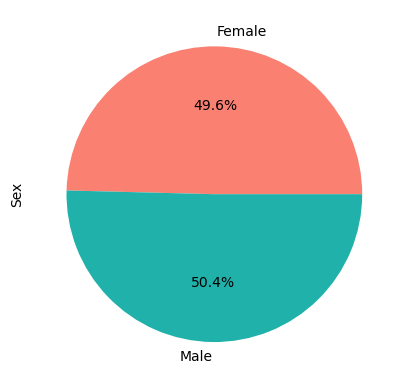

In [27]:
# Create a pie chart showing the trial distribution of male versus female mice using pandas
# First count the mice per gender
mice_gender = cleaned_mouse_df.groupby(['Sex'])['Mouse ID'].nunique()

# Next create the pie chart using the Dataframe.plot() method 
mice_gender.plot(kind='pie', autopct='%1.1f%%', colors=['salmon', 'lightseagreen'], ylabel='Sex')
plt.show()
                 

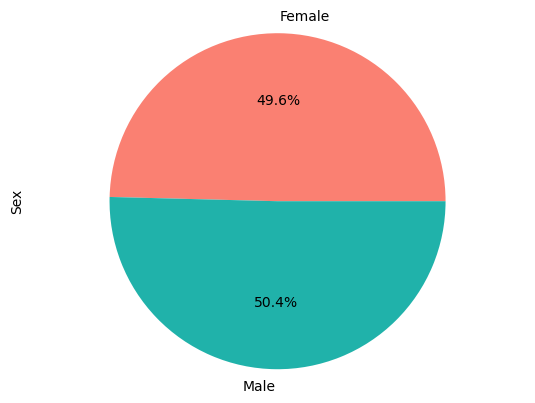

In [30]:
# Create a pie chart showing the trial distribution of male versus female mice using pyplot
# First get the desired data from the gender counts
gender_labels = mice_gender.index
gender_counts = mice_gender.values

# Create the pie chart using matplotlib's pyplot method
plt.pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', colors=['salmon','lightseagreen'])
plt.ylabel('Sex')
plt.axis('equal')
plt.show()

# Quartiles, Outliers, and Boxplots